In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm


import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('cbb19.csv')

In [3]:
df.dtypes #check to make sure types are good

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
dtype: object

In [4]:
df.isna().sum() # null values in POSTSEASON

TEAM            0
CONF            0
G               0
W               0
ADJOE           0
ADJDE           0
BARTHAG         0
EFG_O           0
EFG_D           0
TOR             0
TORD            0
ORB             0
DRB             0
FTR             0
FTRD            0
2P_O            0
2P_D            0
3P_O            0
3P_D            0
ADJ_T           0
WAB             0
POSTSEASON    285
SEED          285
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
dtype: int64

In [7]:
df.head(40)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0
5,Michigan St.,B10,39,32,119.9,91.0,0.9597,55.2,43.9,18.5,...,33.6,27.5,54.3,41.9,37.8,31.6,68.6,10.7,F4,2.0
6,Kentucky,SEC,37,30,117.5,89.8,0.9568,53.0,46.6,18.6,...,41.9,26.8,52.9,43.6,35.4,34.3,66.9,8.8,E8,2.0
7,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,33.3,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0
8,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0
9,Purdue,B10,36,26,122.8,94.3,0.9539,53.6,49.0,15.8,...,29.9,31.7,51.5,47.2,37.4,34.2,67.0,6.1,E8,3.0


In [8]:
#Making a column called PostSeason Weight that gives a numerical value based off the place a team finished in the tournament

conditions = [
    (df['POSTSEASON'] == 'Champions'),
    (df['POSTSEASON'] == '2ND'),
    (df['POSTSEASON'] == 'F4'),
    (df['POSTSEASON'] == 'E8'),
    (df['POSTSEASON'] == 'S16'),
    (df['POSTSEASON'] == 'R32'), 
    
]
values = [
    35,
    30,
    25,
    20,
    15,
    5
]


In [9]:
df['PostSeason Weight'] = np.select(conditions, values, 0) #default to 0 if they lost in R64 or didn't make the tournament

In [10]:
df.head(15)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,PostSeason Weight
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0,20
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,35
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0,20
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0,15
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0,15
5,Michigan St.,B10,39,32,119.9,91.0,0.9597,55.2,43.9,18.5,...,27.5,54.3,41.9,37.8,31.6,68.6,10.7,F4,2.0,25
6,Kentucky,SEC,37,30,117.5,89.8,0.9568,53.0,46.6,18.6,...,26.8,52.9,43.6,35.4,34.3,66.9,8.8,E8,2.0,20
7,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,15
8,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,30
9,Purdue,B10,36,26,122.8,94.3,0.9539,53.6,49.0,15.8,...,31.7,51.5,47.2,37.4,34.2,67.0,6.1,E8,3.0,20


In [11]:
#Making new column that averages the 2 columns Wins and PostSeason Weight to show teams performance combined from
# tournament and regular season
df['Combined Score'] = (df['W'] * 0.5) + (df['PostSeason Weight'] * 0.5)

In [12]:
df.head(15)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,PostSeason Weight,Combined Score
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0,20,26.5
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,35,35.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0,20,26.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0,15,22.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0,15,22.5
5,Michigan St.,B10,39,32,119.9,91.0,0.9597,55.2,43.9,18.5,...,54.3,41.9,37.8,31.6,68.6,10.7,F4,2.0,25,28.5
6,Kentucky,SEC,37,30,117.5,89.8,0.9568,53.0,46.6,18.6,...,52.9,43.6,35.4,34.3,66.9,8.8,E8,2.0,20,25.0
7,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,15,23.0
8,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,30,30.5
9,Purdue,B10,36,26,122.8,94.3,0.9539,53.6,49.0,15.8,...,51.5,47.2,37.4,34.2,67.0,6.1,E8,3.0,20,23.0


In [13]:
df.corr()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,PostSeason Weight,Combined Score
G,1.000000,0.489366,0.522457,-0.624495,0.571886,-0.081940,-0.411599,-0.125710,0.095972,0.340437,...,-0.088145,-0.062245,-0.403506,-0.093179,-0.218507,-0.105192,0.621736,-0.648051,0.755197,0.725002
W,0.489366,1.000000,0.545372,-0.494212,0.516961,0.394392,-0.523021,-0.335697,0.069710,0.334232,...,-0.086678,0.419387,-0.463035,0.171001,-0.353228,-0.005431,0.688397,-0.578942,0.653020,0.835334
ADJOE,0.522457,0.545372,1.000000,-0.471807,0.778045,0.506866,-0.212144,-0.382254,-0.153537,0.331762,...,-0.330969,0.480031,-0.251289,0.260914,-0.049210,0.101213,0.799434,-0.817299,0.687015,0.695746
ADJDE,-0.624495,-0.494212,-0.471807,1.000000,-0.859387,0.177661,0.754600,0.171435,-0.148655,-0.296046,...,0.129581,0.067396,0.676945,0.239454,0.507911,0.141549,-0.820460,0.798557,-0.555335,-0.581676
BARTHAG,0.571886,0.516961,0.778045,-0.859387,1.000000,0.115955,-0.534555,-0.293424,0.001925,0.344960,...,-0.224722,0.187506,-0.525210,-0.049118,-0.282868,-0.022231,0.914758,-0.867425,0.545075,0.582449
EFG_O,-0.081940,0.394392,0.506866,0.177661,0.115955,1.000000,0.096875,-0.296852,-0.227726,-0.187396,...,-0.303610,0.842646,0.092336,0.705895,0.077185,0.112365,0.147533,-0.141737,0.247106,0.321871
EFG_D,-0.411599,-0.523021,-0.212144,0.754600,-0.534555,0.096875,1.000000,0.014676,0.121707,-0.274916,...,0.091472,-0.029477,0.881154,0.193096,0.690788,0.133443,-0.534167,0.502760,-0.435166,-0.504857
TOR,-0.125710,-0.335697,-0.382254,0.171435,-0.293424,-0.296852,0.014676,1.000000,0.073185,0.409602,...,0.263009,-0.231501,-0.026457,-0.238665,0.065575,-0.014344,-0.314707,0.234780,-0.184397,-0.255144
TORD,0.095972,0.069710,-0.153537,-0.148655,0.001925,-0.227726,0.121707,0.073185,1.000000,0.016450,...,0.517336,-0.174368,0.212658,-0.197327,-0.095874,0.020057,-0.010034,-0.001598,0.053812,0.064248
ORB,0.340437,0.334232,0.331762,-0.296046,0.344960,-0.187396,-0.274916,0.409602,0.016450,1.000000,...,0.111274,-0.039102,-0.323081,-0.296504,-0.086629,-0.003324,0.383441,-0.395147,0.302130,0.340076


In [14]:
df.dtypes

TEAM                  object
CONF                  object
G                      int64
W                      int64
ADJOE                float64
ADJDE                float64
BARTHAG              float64
EFG_O                float64
EFG_D                float64
TOR                  float64
TORD                 float64
ORB                  float64
DRB                  float64
FTR                  float64
FTRD                 float64
2P_O                 float64
2P_D                 float64
3P_O                 float64
3P_D                 float64
ADJ_T                float64
WAB                  float64
POSTSEASON            object
SEED                 float64
PostSeason Weight      int32
Combined Score       float64
dtype: object

In [15]:
#Using p values to decide which variables to use
X = df.drop(['TEAM', 'CONF', 'POSTSEASON', 'W', 'PostSeason Weight', 'Combined Score'], axis = 1)
Y = df['W']

In [16]:
X = sm.add_constant(X) 
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     41.59
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.94e-23
Time:                        21:10:51   Log-Likelihood:                -97.102
No. Observations:                  68   AIC:                             234.2
Df Residuals:                      48   BIC:                             278.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2118     11.311     -0.549      0.585     -28.953      16.530
G              0.6053      0.120      5.064      0.000       0.365       0.846
ADJOE         -0.2762      0.123     -2.245      0.029      -0.524      -0.029
ADJDE          0.5706      0.171      3.333      0.002       0.226       0.915
BARTHAG       -6.9954      4.265     -1.640      0.108     -15.572       1.581
EFG_O          1.3972      0.986      1.417      0.163      -0.585       3.380
EFG_D         -1.5747      1.333     -1.182      0.243      -4.254       1.105
TOR           -0.7123      0.161     -4.420      0.000      -1.036      -0.388
TORD           0.8878      0.152      5.828      0.000       0.581       1.194
ORB            0.2804      0.074      3.791      0.000       0.132       0.429
DRB           -0.4420      0.090     -4.938      0.000      -0.622      -0.262
FTR            0.0678      0.041      1.672      0.101      -0.014       0.149
FTRD          -0.0176      0.050     -0.354      0.725      -0.118       0.083
2P_O          -0.3832      0.601     -0.638      0.526      -1.591       0.824
2P_D           0.3507      0.813      0.431      0.668      -1.284       1.986
3P_O          -0.3876      0.575     -0.674      0.503      -1.543       0.768
3P_D           0.3630      0.773      0.470      0.641      -1.191       1.917
ADJ_T         -0.1025      0.067     -1.539      0.130      -0.236       0.031
WAB            1.0814      0.111      9.716      0.000       0.858       1.305
SEED           0.2182      0.134      1.633      0.109      -0.051       0.487
==============================================================================
Omnibus:                        0.922   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.470
Skew:                          -0.182   Prob(JB):                        0.790
Kurtosis:                       3.183   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X = X.drop(['BARTHAG', 'EFG_O', 'EFG_D', 'WAB', 'SEED', 'FTR', 'FTRD', 
           'ADJ_T'], axis = 1)

In [18]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     19.81
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.74e-15
Time:                        21:10:51   Log-Likelihood:                -140.37
No. Observations:                  68   AIC:                             304.7
Df Residuals:                      56   BIC:                             331.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6591     14.336     -0.395      0.695     -34.378      23.060
G              0.6663      0.184      3.617      0.001       0.297       1.035
ADJOE         -0.1240      0.130     -0.957      0.343      -0.384       0.136
ADJDE          0.1170      0.143      0.820      0.416      -0.169       0.403
TOR           -1.0685      0.249     -4.284      0.000      -1.568      -0.569
TORD           0.6778      0.199      3.402      0.001       0.279       1.077
ORB            0.4655      0.119      3.915      0.000       0.227       0.704
DRB           -0.3158      0.144     -2.200      0.032      -0.603      -0.028
2P_O           0.5712      0.144      3.962      0.000       0.282       0.860
2P_D          -0.5100      0.163     -3.134      0.003      -0.836      -0.184
3P_O           0.5366      0.158      3.388      0.001       0.219       0.854
3P_D          -0.4190      0.176     -2.387      0.020      -0.771      -0.067
==============================================================================
Omnibus:                        2.259   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                2.200
Skew:                          -0.379   Prob(JB):                        0.333
Kurtosis:                       2.552   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Using regression to predict wins based off relavent in game stats
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [20]:
X = sm.add_constant(x_train)
model = sm.OLS(y_train,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     11.90
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           7.88e-09
Time:                        21:10:51   Log-Likelihood:                -98.312
No. Observations:                  47   AIC:                             220.6
Df Residuals:                      35   BIC:                             242.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.5564     19.256     -0.548      0.587     -49.648      28.535
G              0.7167      0.241      2.969      0.005       0.227       1.207
ADJOE         -0.1375      0.158     -0.869      0.391      -0.459       0.184
ADJDE          0.0933      0.182      0.513      0.611      -0.276       0.462
TOR           -1.0232      0.371     -2.761      0.009      -1.775      -0.271
TORD           0.6924      0.264      2.624      0.013       0.157       1.228
ORB            0.4539      0.167      2.713      0.010       0.114       0.794
DRB           -0.4051      0.212     -1.911      0.064      -0.835       0.025
2P_O           0.4569      0.194      2.358      0.024       0.063       0.850
2P_D          -0.4649      0.223     -2.084      0.044      -0.918      -0.012
3P_O           0.7044      0.213      3.305      0.002       0.272       1.137
3P_D          -0.2167      0.236     -0.917      0.365      -0.696       0.263
==============================================================================
Omnibus:                        2.182   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.359
Skew:                          -0.106   Prob(JB):                        0.507
Kurtosis:                       2.194   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X = sm.add_constant(x_test)
model = sm.OLS(y_test,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     8.539
Date:                Mon, 23 Nov 2020   Prob (F-statistic):            0.00164
Time:                        21:10:51   Log-Likelihood:                -33.608
No. Observations:                  21   AIC:                             91.22
Df Residuals:                       9   BIC:                             103.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.7935     42.897     -0.275      0.790    -108.833      85.246
G              0.8256      0.405      2.039      0.072      -0.090       1.742
ADJOE         -0.0747      0.504     -0.148      0.886      -1.216       1.067
ADJDE          0.4492      0.365      1.230      0.250      -0.377       1.276
TOR           -1.2778      0.558     -2.289      0.048      -2.541      -0.015
TORD           0.7448      0.595      1.251      0.242      -0.602       2.091
ORB            0.3677      0.259      1.422      0.189      -0.217       0.953
DRB           -0.2723      0.321     -0.848      0.418      -0.999       0.454
2P_O           0.6907      0.434      1.590      0.146      -0.292       1.673
2P_D          -0.9051      0.288     -3.147      0.012      -1.556      -0.254
3P_O           0.1745      0.371      0.470      0.650      -0.666       1.015
3P_D          -0.6626      0.448     -1.478      0.174      -1.677       0.352
==============================================================================
Omnibus:                        1.513   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.897
Skew:                          -0.505   Prob(JB):                        0.639
Kurtosis:                       2.920   Cond. No.                     1.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
y_pred = model.predict(X)

In [23]:
newdf = pd.DataFrame(list(zip(y_pred, y_test)),columns = ['Predictions', 'Test'])

In [24]:
newdf.head(20) 
#Amount of games we are predicting a team will win based off selected stats is showed in column 1
#Column 2 shows the data from Testing of the actual amount that the team won

,Predictions,Test
0,27.764951,28
1,29.888520,29
2,23.917910,24
3,30.749622,32
4,28.850791,28
5,23.556356,21
6,20.418928,20
7,20.853042,20
8,25.937850,26
9,21.664959,23


In [25]:
#Relatively good predictions, but because of not great r-squared value, our predictions won't be exact. 
#Most predictions are within 2-3 Wins of the Test amount. We have some outliers that are 4-5 off, but that still isn't to 
# bad.

In [26]:
#Now doing regression for PostSeason Weight and using it to predict Wins

In [27]:
X = df.drop(['TEAM', 'CONF', 'POSTSEASON', 'W', 'PostSeason Weight', 'Combined Score', 'BARTHAG', 'EFG_O', 'EFG_D', 'WAB', 
             'SEED', 'FTR', 'FTRD', 'ADJ_T'], axis = 1)
Y = df['PostSeason Weight']

In [28]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PostSeason Weight   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     17.88
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.53e-14
Time:                        21:10:52   Log-Likelihood:                -190.56
No. Observations:                  68   AIC:                             405.1
Df Residuals:                      56   BIC:                             431.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -172.0693     29.990     -5.738      0.000    -232.147    -111.992
G              2.2839      0.385      5.927      0.000       1.512       3.056
ADJOE          1.0071      0.271      3.716      0.000       0.464       1.550
ADJDE          0.6302      0.299      2.110      0.039       0.032       1.228
TOR            0.8441      0.522      1.618      0.111      -0.201       1.889
TORD           0.9222      0.417      2.212      0.031       0.087       1.757
ORB           -0.3364      0.249     -1.353      0.182      -0.835       0.162
DRB           -0.4029      0.300     -1.342      0.185      -1.005       0.199
2P_O          -0.2796      0.302     -0.927      0.358      -0.884       0.325
2P_D          -0.6265      0.340     -1.840      0.071      -1.308       0.055
3P_O           0.1988      0.331      0.600      0.551      -0.465       0.863
3P_D          -1.4494      0.367     -3.948      0.000      -2.185      -0.714
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.163
Skew:                           0.059   Prob(JB):                        0.922
Kurtosis:                       3.209   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [30]:
X = sm.add_constant(x_train)
model = sm.OLS(y_train,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PostSeason Weight   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     13.95
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           9.63e-10
Time:                        21:10:52   Log-Likelihood:                -131.50
No. Observations:                  47   AIC:                             287.0
Df Residuals:                      35   BIC:                             309.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -174.9717     39.017     -4.485      0.000    -254.180     -95.763
G              2.5908      0.489      5.297      0.000       1.598       3.584
ADJOE          0.9970      0.321      3.110      0.004       0.346       1.648
ADJDE          0.6868      0.369      1.864      0.071      -0.061       1.435
TOR            0.1546      0.751      0.206      0.838      -1.370       1.679
TORD           1.3442      0.535      2.514      0.017       0.259       2.430
ORB           -0.3863      0.339     -1.139      0.262      -1.075       0.302
DRB           -0.8475      0.429     -1.974      0.056      -1.719       0.024
2P_O          -0.4034      0.393     -1.027      0.311      -1.201       0.394
2P_D          -0.7801      0.452     -1.726      0.093      -1.697       0.137
3P_O           0.3363      0.432      0.779      0.441      -0.540       1.213
3P_D          -0.9969      0.479     -2.082      0.045      -1.969      -0.025
==============================================================================
Omnibus:                        0.655   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.133
Skew:                          -0.039   Prob(JB):                        0.936
Kurtosis:                       3.249   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X = sm.add_constant(x_test)
model = sm.OLS(y_test,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PostSeason Weight   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     6.043
Date:                Mon, 23 Nov 2020   Prob (F-statistic):            0.00584
Time:                        21:10:52   Log-Likelihood:                -42.330
No. Observations:                  21   AIC:                             108.7
Df Residuals:                       9   BIC:                             121.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -86.8265     64.983     -1.336      0.214    -233.828      60.175
G              1.5906      0.613      2.593      0.029       0.203       2.978
ADJOE          0.9787      0.764      1.281      0.232      -0.750       2.707
ADJDE          0.5978      0.553      1.080      0.308      -0.654       1.850
TOR            0.7403      0.846      0.875      0.404      -1.173       2.653
TORD          -0.7769      0.902     -0.862      0.411      -2.816       1.263
ORB           -0.5061      0.392     -1.292      0.229      -1.392       0.380
DRB            0.4444      0.486      0.914      0.385      -0.656       1.545
2P_O          -0.4593      0.658     -0.698      0.503      -1.948       1.029
2P_D          -0.5020      0.436     -1.152      0.279      -1.488       0.484
3P_O          -1.1744      0.563     -2.087      0.067      -2.447       0.099
3P_D          -1.0866      0.679     -1.600      0.144      -2.623       0.450
==============================================================================
Omnibus:                        3.366   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                2.314
Skew:                           0.813   Prob(JB):                        0.314
Kurtosis:                       2.963   Cond. No.                     1.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
y_pred = model.predict(X)

In [33]:
newdf = pd.DataFrame(list(zip(y_pred, y_test)),columns = ['Predicted Value', 'Actual PostSeason Weight'])

In [34]:
newdf.head(30)
#This is predicting post season success based on the same statistics used above to predict regular season wins

,Predicted Value,Actual PostSeason Weight
0,2.132383,5
1,2.591422,0
2,5.906058,5
3,7.231607,5
4,1.434760,0
5,0.252150,0
6,-0.804950,0
7,0.459548,0
8,-0.688104,0
9,1.819250,0


In [35]:
#Doing Regression for Combined Score to predict how good of an overall season a team will have based on their stats

In [36]:
X = df.drop(['TEAM', 'CONF', 'POSTSEASON', 'W', 'PostSeason Weight', 'Combined Score', 'BARTHAG', 'EFG_O', 'EFG_D', 'WAB', 
             'SEED', 'FTR', 'FTRD', 'ADJ_T'], axis = 1)
Y = df['Combined Score']

In [37]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Combined Score   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     22.90
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           7.46e-17
Time:                        21:10:54   Log-Likelihood:                -158.49
No. Observations:                  68   AIC:                             341.0
Df Residuals:                      56   BIC:                             367.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -88.8642     18.713     -4.749      0.000    -126.351     -51.377
G              1.4751      0.240      6.134      0.000       0.993       1.957
ADJOE          0.4415      0.169      2.611      0.012       0.103       0.780
ADJDE          0.3736      0.186      2.005      0.050       0.000       0.747
TOR           -0.1122      0.326     -0.345      0.732      -0.765       0.540
TORD           0.8000      0.260      3.076      0.003       0.279       1.321
ORB            0.0645      0.155      0.416      0.679      -0.246       0.375
DRB           -0.3593      0.187     -1.918      0.060      -0.735       0.016
2P_O           0.1458      0.188      0.775      0.442      -0.231       0.523
2P_D          -0.5683      0.212     -2.675      0.010      -0.994      -0.143
3P_O           0.3677      0.207      1.778      0.081      -0.047       0.782
3P_D          -0.9342      0.229     -4.078      0.000      -1.393      -0.475
==============================================================================
Omnibus:                        0.863   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.359
Skew:                           0.123   Prob(JB):                        0.836
Kurtosis:                       3.258   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [39]:
X = sm.add_constant(x_train)
model = sm.OLS(y_train,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Combined Score   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     17.03
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           6.18e-11
Time:                        21:10:54   Log-Likelihood:                -109.64
No. Observations:                  47   AIC:                             243.3
Df Residuals:                      35   BIC:                             265.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -92.7640     24.502     -3.786      0.001    -142.507     -43.022
G              1.6537      0.307      5.384      0.000       1.030       2.277
ADJOE          0.4297      0.201      2.135      0.040       0.021       0.838
ADJDE          0.3901      0.231      1.685      0.101      -0.080       0.860
TOR           -0.4343      0.472     -0.921      0.363      -1.392       0.523
TORD           1.0183      0.336      3.033      0.005       0.337       1.700
ORB            0.0338      0.213      0.159      0.875      -0.398       0.466
DRB           -0.6263      0.270     -2.322      0.026      -1.174      -0.079
2P_O           0.0268      0.247      0.109      0.914      -0.474       0.527
2P_D          -0.6225      0.284     -2.194      0.035      -1.199      -0.046
3P_O           0.5203      0.271      1.919      0.063      -0.030       1.071
3P_D          -0.6068      0.301     -2.018      0.051      -1.217       0.004
==============================================================================
Omnibus:                        1.765   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.903
Skew:                           0.203   Prob(JB):                        0.637
Kurtosis:                       3.545   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X = sm.add_constant(x_test)
model = sm.OLS(y_test,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Combined Score   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     8.748
Date:                Mon, 23 Nov 2020   Prob (F-statistic):            0.00150
Time:                        21:10:54   Log-Likelihood:                -33.648
No. Observations:                  21   AIC:                             91.30
Df Residuals:                       9   BIC:                             103.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.3100     42.978     -1.147      0.281    -146.533      47.913
G              1.2081      0.406      2.978      0.016       0.290       2.126
ADJOE          0.4520      0.505      0.894      0.394      -0.691       1.595
ADJDE          0.5235      0.366      1.430      0.186      -0.304       1.351
TOR           -0.2687      0.559     -0.481      0.642      -1.534       0.996
TORD          -0.0160      0.596     -0.027      0.979      -1.365       1.333
ORB           -0.0692      0.259     -0.267      0.795      -0.655       0.517
DRB            0.0860      0.322      0.267      0.795      -0.642       0.814
2P_O           0.1157      0.435      0.266      0.796      -0.869       1.100
2P_D          -0.7035      0.288     -2.441      0.037      -1.355      -0.052
3P_O          -0.4999      0.372     -1.343      0.212      -1.342       0.342
3P_D          -0.8746      0.449     -1.947      0.083      -1.891       0.142
==============================================================================
Omnibus:                        4.395   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                2.402
Skew:                           0.739   Prob(JB):                        0.301
Kurtosis:                       3.750   Cond. No.                     1.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
y_pred = model.predict(X)

In [42]:
newdf = pd.DataFrame(list(zip(y_pred, y_test)),columns = ['Predicted Score', 'Actual Score'])

In [43]:
newdf.head(30)

,Predicted Score,Actual Score
0,14.948667,16.5
1,16.239971,14.5
2,14.911984,14.5
3,18.990615,18.5
4,15.142776,14.0
5,11.904253,10.5
6,9.806989,10.0
7,10.656295,10.0
8,12.624873,13.0
9,11.742105,11.5


Text(0.5, 1.0, 'Number of Teams in each Conference')

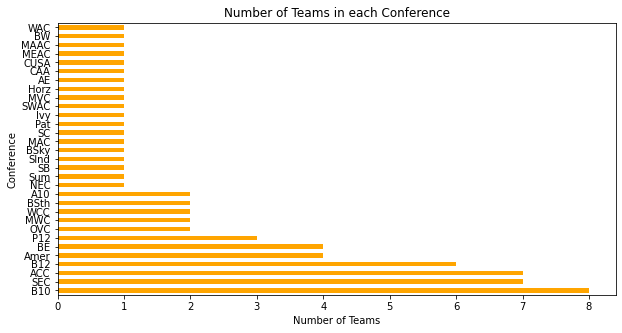

In [44]:
fig = plt.figure(figsize = (10, 5))
df['CONF'].value_counts().plot(kind = 'barh', color = 'orange')
plt.xlabel("Number of Teams")
plt.ylabel("Conference")
plt.title("Number of Teams in each Conference")

In [45]:
# The number of teams that made the post season in each conference

Text(0.5, 1.0, 'Number of Teams in each Conference')

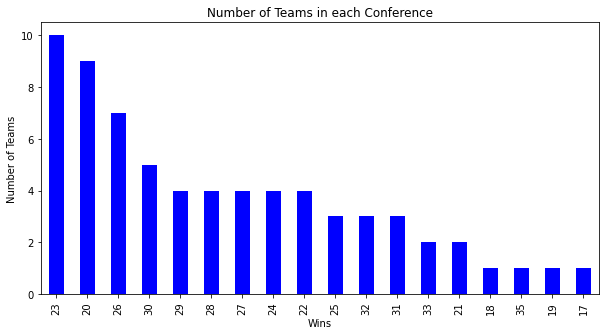

In [46]:
fig = plt.figure(figsize = (10, 5))
df['W'].value_counts().plot(kind = 'bar', color = 'blue')
plt.xlabel("Wins")
plt.ylabel("Number of Teams")
plt.title("Number of Teams in each Conference")

In [47]:
#This shows the number of wins and how many teams had that many total wins in the regular season 
#This graph shows from the left being the amount of wins the most seasons had to on the right the amount of wins only 1 team
# had. 

Text(0.5, 1.0, 'Number of Teams in each Conference')

<Figure size 720x360 with 0 Axes>

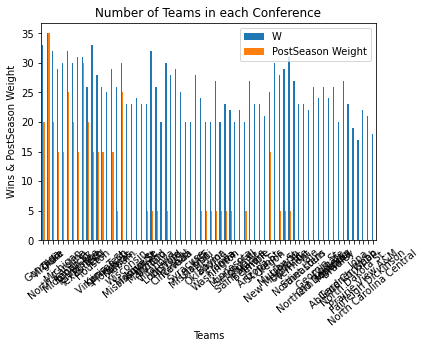

In [48]:
fig = plt.figure(figsize = (10, 5))
df.plot.bar(x = 'TEAM', y = ['W', 'PostSeason Weight'], rot = 40)
plt.xlabel("Teams")
plt.ylabel("Wins & PostSeason Weight")
plt.title("Number of Teams in each Conference")

In [49]:
df.head(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,PostSeason Weight,Combined Score
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0,20,26.5
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,35,35.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0,20,26.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0,15,22.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0,15,22.5


Text(0.5, 1.0, 'Percentange(%) of Teams in each Conference')

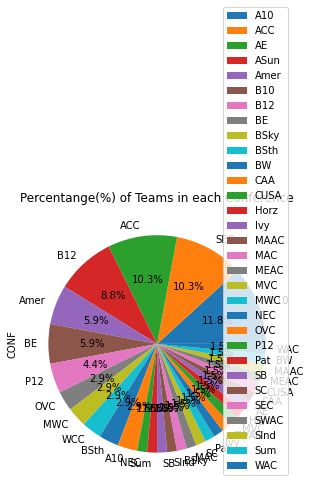

In [50]:
fig = plt.figure(figsize = (10, 5))
df['CONF'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.legend(['A10','ACC','AE','ASun','Amer','B10','B12','BE','BSky','BSth','BW','CAA','CUSA','Horz','Ivy','MAAC',
            'MAC','MEAC','MVC',
'MWC','NEC','OVC','P12','Pat','SB','SC','SEC','SWAC','Slnd','Sum','WAC','WCC'
], loc = 'lower right')
plt.title("Percentange(%) of Teams in each Conference")
#this pie chart doenst look clean but it shows the percentage of the teams in each conference and it is very balanced
#Although this could be made cleaner and look nicer I just dont know how to do that

In [51]:
X = df.drop(['TEAM', 'CONF', 'POSTSEASON', 'BARTHAG', 'EFG_O', 'EFG_D', 'WAB', 'SEED', 'FTR', 'FTRD', 
           'ADJ_T', 'G', 'ADJDE', 'TOR', 'TORD', 'ORB', 'DRB', '2P_O', '2P_D', '3P_O', '3P_D', 
            'W', 'PostSeason Weight'], axis = 1)
X.head(10) 

,ADJOE,Combined Score
0,123.4,26.5
1,123.0,35.0
2,118.9,26.0
3,120.1,22.0
4,114.6,22.5
5,119.9,28.5
6,117.5,25.0
7,122.8,23.0
8,115.2,30.5
9,122.8,23.0


In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)

In [53]:
y_pred = kmeans.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

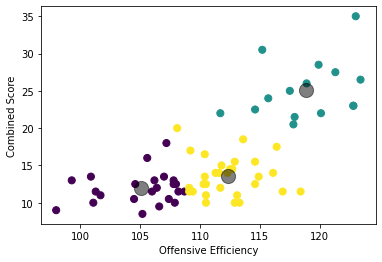

In [54]:
x = np.array(X)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel('Combined Score')
plt.xlabel('Offensive Efficiency')
plt.show()

In [55]:
# Offesive efficency shows how many points your team is scoring on 100 offensive drives. This is clearly a really big
# factor in dtermining what teams have a better combined score. The is a very direct correlation to the better teams having
# better offesive efficencies. 

In [56]:
X = df.drop(['TEAM', 'CONF', 'POSTSEASON', 'BARTHAG', 'EFG_O', 'EFG_D', 'WAB', 'SEED', 'FTR', 'FTRD', 
           'ADJ_T', 'G', 'ADJOE', 'TOR', 'TORD', 'ORB', 'DRB', '2P_O', '2P_D', '3P_O', '3P_D', 
            'W', 'PostSeason Weight'], axis = 1)
X.head(10) 

,ADJDE,Combined Score
0,89.9,26.5
1,89.9,35.0
2,89.2,26.0
3,91.4,22.0
4,85.6,22.5
5,91.0,28.5
6,89.8,25.0
7,95.2,23.0
8,85.2,30.5
9,94.3,23.0


In [57]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)

In [58]:
y_pred = kmeans.predict(X)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

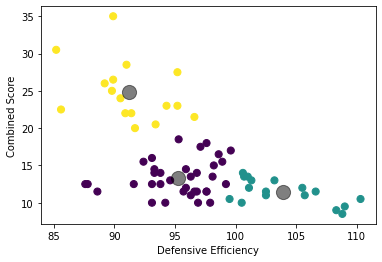

In [59]:
x = np.array(X)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel('Combined Score')
plt.xlabel('Defensive Efficiency')
plt.show()

In [60]:
# Defensive efficiency is better to be low because it's how many pts your team allows on defense per every 100 drives 
#against. So seeing that teams with really low defensive efficiencies tend to have a significant;y greater combinded score
# meaning defensive efficiency is important in determining a teams success over a whole year

In [61]:
X = df.drop(['TEAM', 'CONF', 'POSTSEASON', 'BARTHAG', 'EFG_D', 'WAB', 'SEED', 'FTR', 'FTRD', 
           'ADJ_T', 'G', 'ADJDE', 'TOR', 'TORD', 'ORB', 'DRB', '2P_O', '2P_D', '3P_O', '3P_D', 
            'PostSeason Weight', 'W', 'ADJOE'], axis = 1)
X.head(10) 

,EFG_O,Combined Score
0,59.0,26.5
1,55.2,35.0
2,53.6,26.0
3,52.9,22.0
4,51.6,22.5
5,55.2,28.5
6,53.0,25.0
7,55.3,23.0
8,53.5,30.5
9,53.6,23.0


In [62]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)

In [63]:
y_pred = kmeans.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 0])

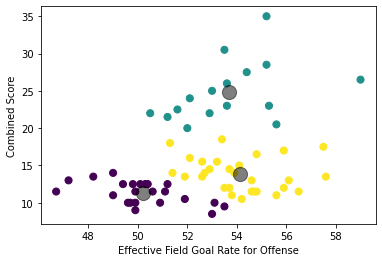

In [64]:
x = np.array(X)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel('Combined Score')
plt.xlabel('Effective Field Goal Rate for Offense')
plt.show()

In [65]:
#This shows how teams that the higher perentage of shots your team makes, the more likely they are to have a better season
# But from this graph we can tell that once you reach a shooting percetange greater than 54, it doesn't really matter
# how good it is. The 54% just seems to be the sweet spot in seperating the good and bad teams

In [66]:
X = df.drop(['TEAM', 'CONF', 'POSTSEASON', 'BARTHAG', 'EFG_O', 'WAB', 'SEED', 'FTR', 'FTRD', 
           'ADJ_T', 'G', 'ADJDE', 'TOR', 'TORD', 'ORB', 'DRB', '2P_O', '2P_D', '3P_O', '3P_D', 
            'PostSeason Weight', 'W', 'ADJOE'], axis = 1)
X.head(10) 

,EFG_D,Combined Score
0,44.2,26.5
1,44.7,35.0
2,45.0,26.0
3,48.9,22.0
4,44.1,22.5
5,43.9,28.5
6,46.6,25.0
7,48.1,23.0
8,43.0,30.5
9,49.0,23.0


In [67]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X)

In [68]:
y_pred = kmeans.predict(X)
y_pred

array([2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

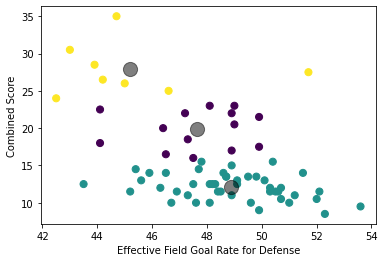

In [69]:
x = np.array(X)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel('Combined Score')
plt.xlabel('Effective Field Goal Rate for Defense')
plt.show()

In [70]:
# This shows that teams that don't allow their oppoontents to score a high percetage of shots, tend to do better in the
# regular season and tournament